In [2]:
import pystan
import arviz

# this code is implemtetion of idea about inference of private data (found the idea on the web)

the expirment talks about how to make a discrete surevy to infere the number of cheaters, it goes as -> 
1) toss a coin
1.1) if it's head - answer the truth
1.2) if it's tail - toss the coin again and anwer the result of the coin

in this way if your answer was true, there no way know if it's from the random coin flip , or the actual private information.
one that see all the answers can dudce the correct number , because he knows how a coin flip should act.

In [66]:
model = """

data {
    int<lower=0> N; // number of people answered the survey
    int<lower=0, upper = 1> answers[N]; // boolean array of answers
}

parameters {
    real<lower=0, upper=1> theta; // the latent variable we want to infer
    real<lower=0, upper=1> coin_results[N]; // helper coin results buffer
}


model {
    theta ~ beta(0.5, 0.5); // beta prior
    for (i in 1:N){
        coin_results[i] ~ normal(0 , 1);
        if (coin_results[i] >= 0){
            answers[i] ~ bernoulli(theta);
        }
        else{
            answers[i] ~ bernoulli(0.5);
        }
    }
    
}
"""

In [67]:
results = [1, 1, 1, 1, 1, 1 ,0 , 1 ,1, 1, 1 ,0 ]

exp_data = {
    'N': len(results),
    'answers': results
}

In [68]:
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_66e1034da0c12510232156d4820120c0 NOW.


In [69]:
fit = sm.sampling(data=exp_data, iter=1000, chains=4, control = {"adapt_delta" : 0.9})

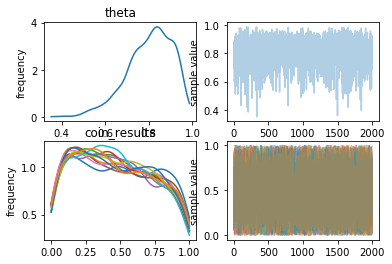

In [70]:
plt = fit.plot()